### Pizza Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
import plotly.express as px

### Import Raw Data

In [2]:
df=pd.read_csv("E:/Pizza sales/pizza_sales.csv")

### MetaData of Raw Data

In [3]:
df.head(10)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
5,6,2,thai_ckn_l,1,01-01-2015,11:57:40,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
6,7,3,ital_supr_m,1,01-01-2015,12:12:28,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
7,8,3,prsc_argla_l,1,01-01-2015,12:12:28,20.75,20.75,L,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",The Prosciutto and Arugula Pizza
8,9,4,ital_supr_m,1,01-01-2015,12:16:31,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
9,10,5,ital_supr_m,1,01-01-2015,12:21:30,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza


In [4]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [5]:
print("The MetaData of the dataset : ",df.shape) #retrurn the number of rows and columns

The MetaData of the dataset :  (48620, 12)


In [6]:
print("The Rows of the dataset : ",df.shape[0]) #return number of rows

The Rows of the dataset :  48620


In [7]:
print("The Columns of the dataset : ",df.shape[1]) #return number of Columns

The Columns of the dataset :  12


In [8]:
df.columns 

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [10]:
df.info

<bound method DataFrame.info of        pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0             1         1     hawaiian_m         1  01-01-2015   11:38:36   
1             2         2  classic_dlx_m         1  01-01-2015   11:57:40   
2             3         2  five_cheese_l         1  01-01-2015   11:57:40   
3             4         2    ital_supr_l         1  01-01-2015   11:57:40   
4             5         2     mexicana_m         1  01-01-2015   11:57:40   
...         ...       ...            ...       ...         ...        ...   
48615     48616     21348  ckn_alfredo_m         1  31-12-2015   21:23:10   
48616     48617     21348  four_cheese_l         1  31-12-2015   21:23:10   
48617     48618     21348   napolitana_s         1  31-12-2015   21:23:10   
48618     48619     21349     mexicana_l         1  31-12-2015   22:09:54   
48619     48620     21350      bbq_ckn_s         1  31-12-2015   23:02:05   

       unit_price  total_price pizza_size p

### Data Types in Raw Data

In [11]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [12]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


### KPI's

In [13]:
total_revenue = df["total_price"].sum()
total_pizzas_sold = df["quantity"].sum()
total_orders = df["order_id"].nunique()
avg_order_value = total_revenue / total_orders
avg_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Orders Value: ${avg_order_value:,.2f}")
print(f"Average Pizzas per Order: ${avg_pizzas_per_order:,.2f}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21,350
Average Orders Value: $38.31
Average Pizzas per Order: $2.32


### Chart's

### Ingredient Analysis

In [14]:
Ingrediant =(
    df['pizza_ingredients']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index':'Ingrediant', 'pizza_ingredients':'counts'})
)

print(Ingrediant.head(10))

              counts  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trend - Total Orders

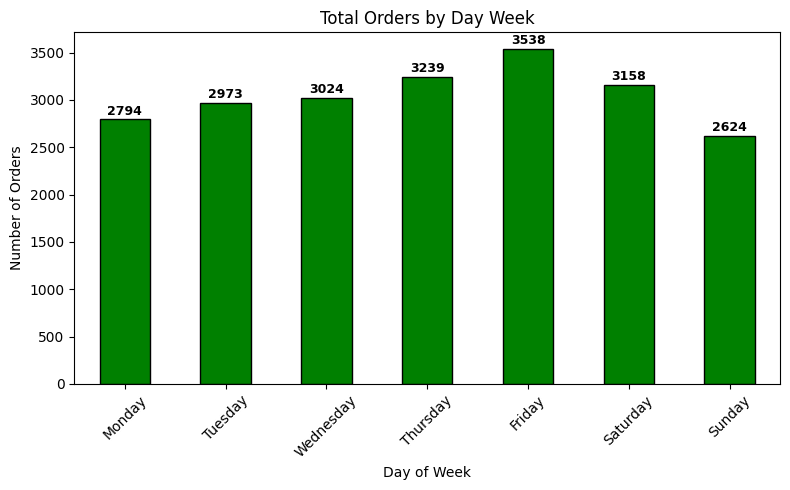

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

Weekday_Order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


df['day_name'] = pd.Categorical(df['day_name'],categories=Weekday_Order,ordered=True)

Orders_by_day = df.groupby('day_name',observed=False)['order_id'].nunique()

ax = Orders_by_day.plot(kind='bar' , figsize=(8,5) , color='green' ,edgecolor = 'black')

plt.title("Total Orders by Day Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

for i , val in enumerate(Orders_by_day):
    plt.text(i ,val + 20 ,str(val), ha='center' , va='bottom' , fontsize = 9, fontweight='bold')

plt.tight_layout()
plt.show()

### Daily Trend - Total Revenue

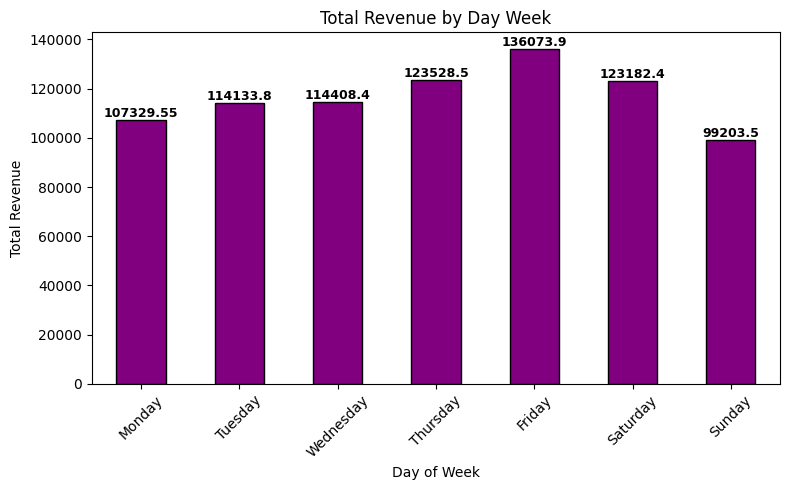

In [16]:
df['order_date'] = pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name'] = df['order_date'].dt.day_name()

Weekday_Order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']


df['day_name'] = pd.Categorical(df['day_name'],categories=Weekday_Order,ordered=True)

Orders_by_day = df.groupby('day_name',observed=False)['total_price'].sum()

ax = Orders_by_day.plot(kind='bar' , figsize=(8,5) , color='purple' ,edgecolor = 'black')

plt.title("Total Revenue by Day Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

for i , val in enumerate(Orders_by_day):
    plt.text(i ,val + 20 ,str(val), ha='center' , va='bottom' , fontsize = 9, fontweight='bold')

plt.tight_layout()
plt.show()

### Hourly Trend - Total Orders

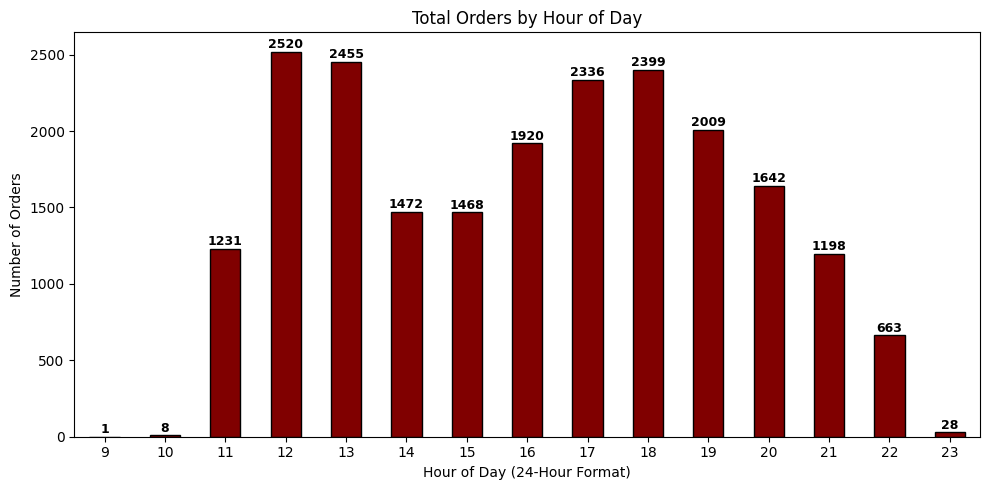

In [17]:
# convert to datetime and extract hour
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['order_hour'] = df['order_time'].dt.hour

# group by hour instead of time
Orders_by_hour = df.groupby('order_hour', observed=False)['order_id'].nunique()

# plot
ax = Orders_by_hour.plot(
    kind='bar',
    figsize=(10,5),
    color='maroon',
    edgecolor='black'
)

plt.title("Total Orders by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

# annotate bars
for i, val in enumerate(Orders_by_hour):
    plt.text(i, val + 5, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Hourly Trend -Total Revenue

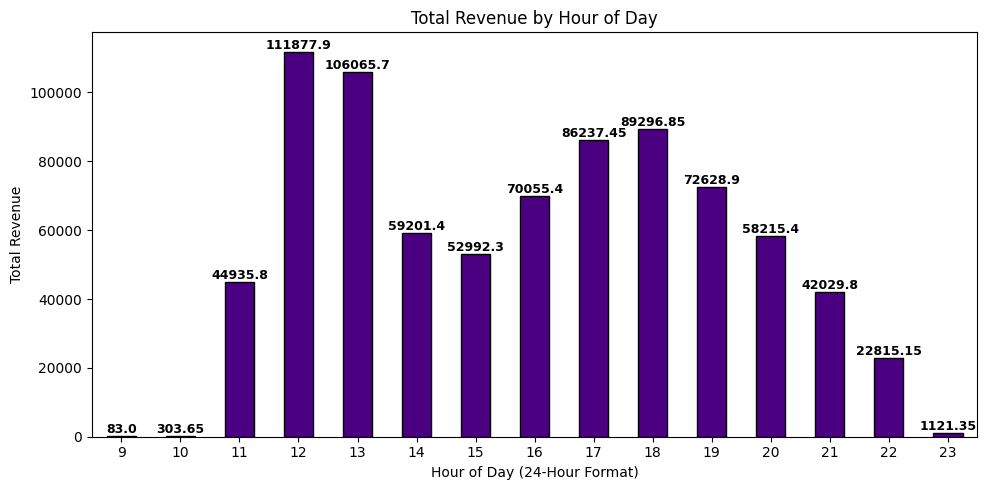

In [18]:
# convert to datetime and extract hour
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S')
df['order_hour'] = df['order_time'].dt.hour

# group by hour instead of time
Orders_by_hour = df.groupby('order_hour', observed=False)['total_price'].sum()

# plot
ax = Orders_by_hour.plot(
    kind='bar',
    figsize=(10,5),
    color='indigo',
    edgecolor='black'
)

plt.title("Total Revenue by Hour of Day")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)

# annotate bars
for i, val in enumerate(Orders_by_hour):
    plt.text(i, val + 5, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Monthly Trend - Total Orders

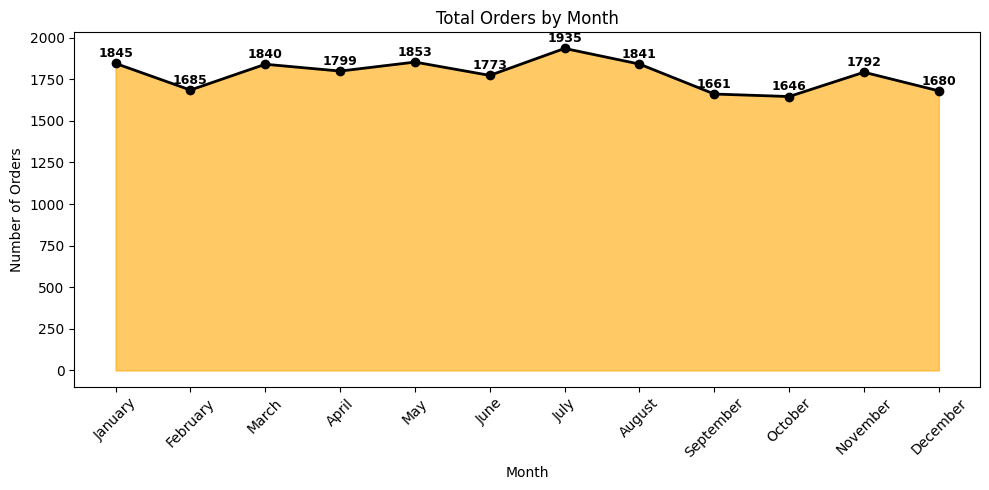

In [19]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['Month_name'] = df['order_date'].dt.month_name()

# define month order
month_order = ['January','February','March','April','May','June','July',
               'August','September','October','November','December']

# apply categorical ordering to the same column you created
df['Month_name'] = pd.Categorical(df['Month_name'],
                                  categories=month_order,
                                  ordered=True)

# group by month name
Orders_by_month = df.groupby('Month_name', observed=False)['order_id'].nunique()

# create numeric x positions for fill_between
x = range(len(Orders_by_month))
y = Orders_by_month.values

plt.figure(figsize=(10,5))
plt.fill_between(x, y, color='orange', alpha=0.6)
plt.plot(x, y, color='black', linewidth=2, marker='o')

plt.title("Total Orders by Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(x, Orders_by_month.index, rotation=45)

# annotate points
for i, val in enumerate(y):
    plt.text(i, val + 20, str(int(val)),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### % of sales by category

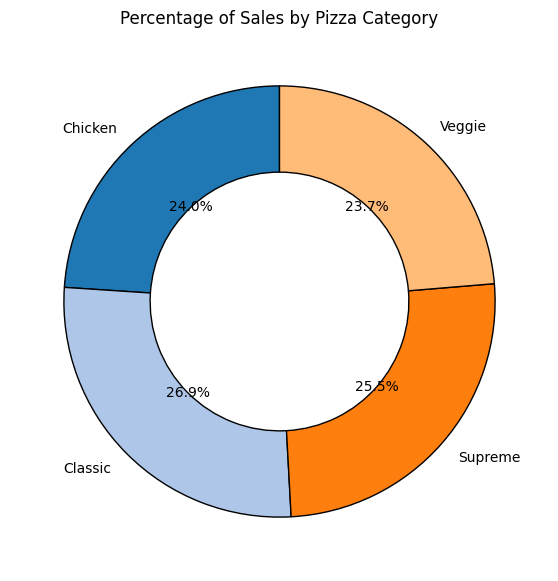

In [20]:
import matplotlib.pyplot as plt

category_sales = df.groupby('pizza_category')['total_price'].sum()
category_pct = category_sales / category_sales.sum() * 100

plt.figure(figsize=(7,7))

colors = plt.get_cmap('tab20').colors  # nice color palette

plt.pie(
    category_pct,
    labels=category_pct.index,
    autopct='%1.1f%%',          # show % with 1 decimal place
    startangle=90,              # rotate so first slice at top
    colors=colors,              # correct spelling
    wedgeprops={'edgecolor': 'black', 'width': 0.4}  # width < 1 gives donut style
)

plt.title("Percentage of Sales by Pizza Category")
plt.show()


### Sales by Pizza size & Category

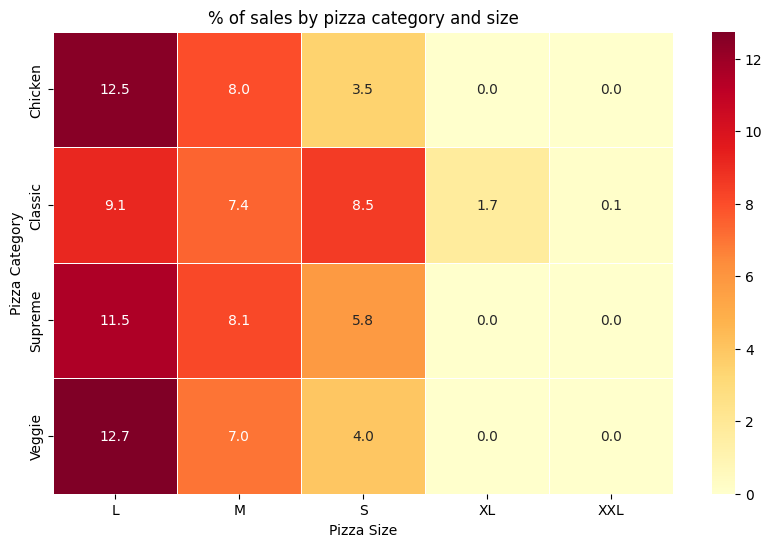

In [21]:
sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

# Calculate percentage of total sales
sales_pct = sales_pivot / sales_pivot.sum().sum() * 100

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(sales_pct, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5)
plt.title("% of sales by pizza category and size")
plt.xlabel("Pizza Size")       # x-axis corresponds to columns
plt.ylabel("Pizza Category")   # y-axis corresponds to index
plt.show()


### Total Pizzas Sold by Pizza Category

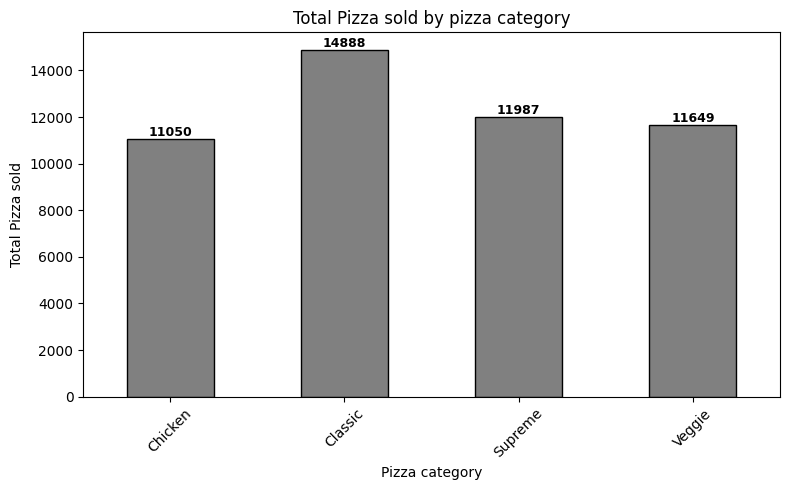

In [27]:
pizzas_by_category = df.groupby('pizza_category')['quantity'].sum()

ax = pizzas_by_category.plot(
    kind='bar', figsize=(8,5),
    color='grey', edgecolor='black'
)

plt.title("Total Pizza sold by pizza category")
plt.xlabel("Pizza category")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(pizzas_by_category.values):
    plt.text(i, val + 5, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best Selling Pizzas - Total Quantity

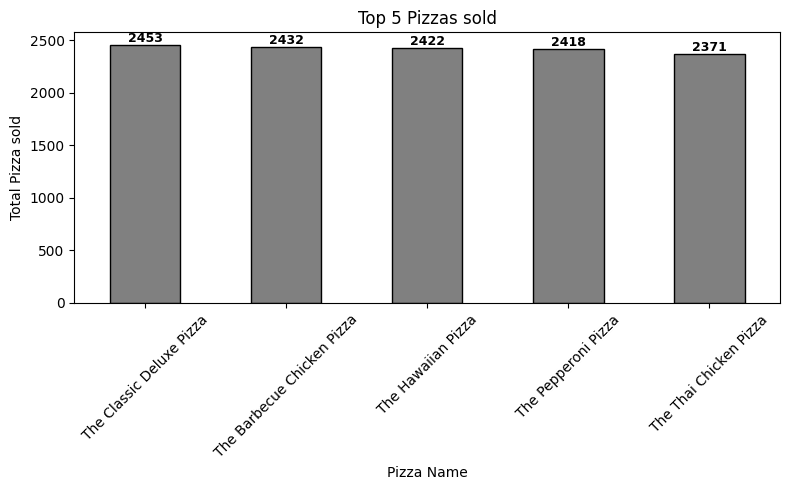

In [35]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()

Top5 =  pizzas_by_name.sort_values(ascending=False).head(5)

ax = Top5.plot(
    kind='bar', figsize=(8,5),
    color='grey', edgecolor='black'
)

plt.title("Top 5 Pizzas sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Top5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best Selling Pizzas - Total Orders

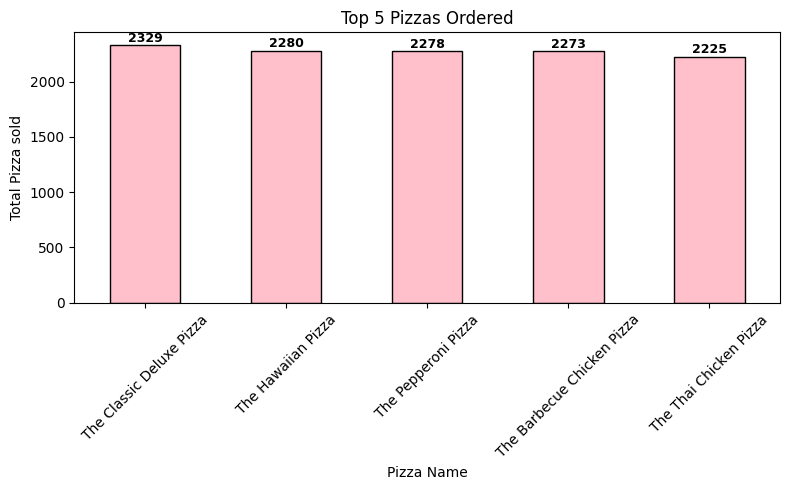

In [36]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

Top5 =  pizzas_by_name.sort_values(ascending=False).head(5)

ax = Top5.plot(
    kind='bar', figsize=(8,5),
    color='pink', edgecolor='black'
)

plt.title("Top 5 Pizzas Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Top5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Top 5 Best Selling Pizzas - Total Sales

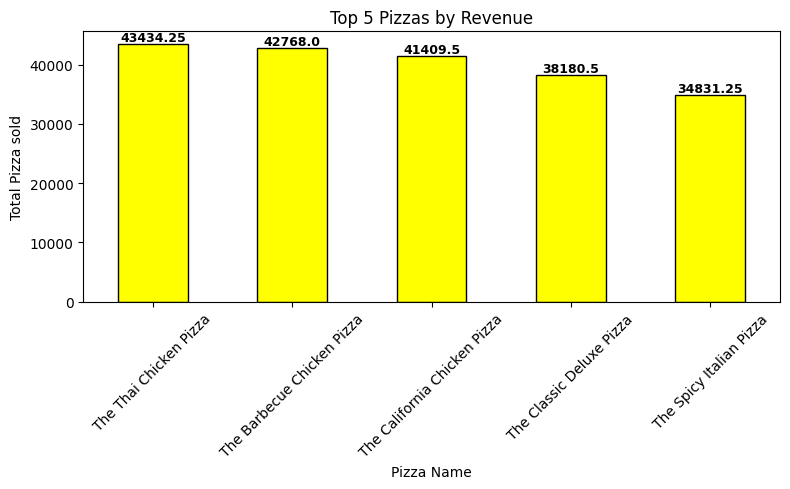

In [39]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()

Top5 =  pizzas_by_name.sort_values(ascending=False).head(5)

ax = Top5.plot(
    kind='bar', figsize=(8,5),
    color='yellow', edgecolor='black'
)

plt.title("Top 5 Pizzas by Revenue")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Top5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Bottom 5 Selling Pizzas - Total Sales

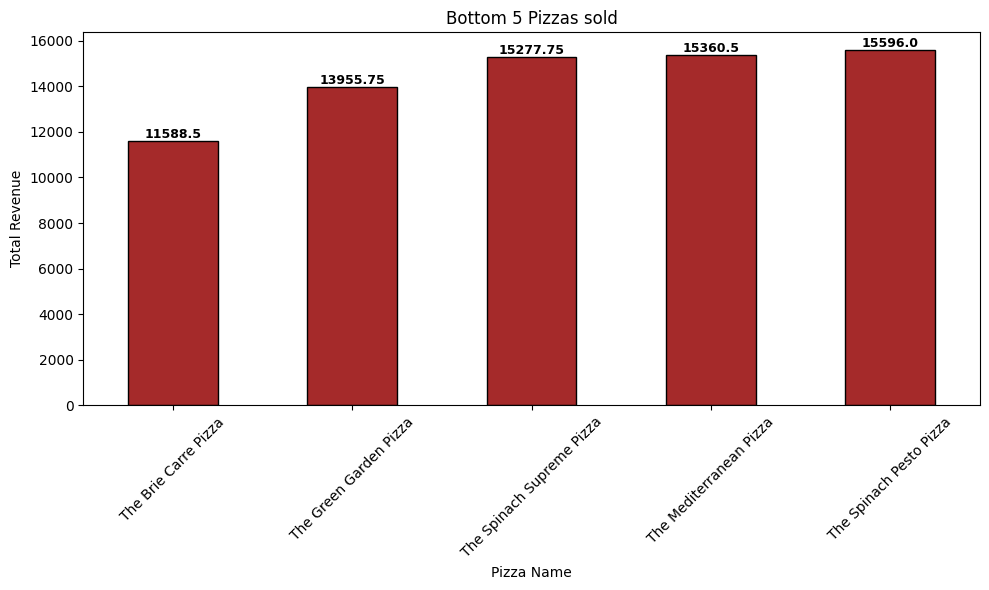

In [63]:
pizzas_by_name = df.groupby('pizza_name')['total_price'].sum()

Bottom5 =  pizzas_by_name.sort_values(ascending=True).head(5)

ax = Bottom5.plot(
    kind='bar', figsize=(10,6),
    color='brown', edgecolor='black'
)

plt.title("Bottom 5 Pizzas sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Bottom5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Bottom 5 Selling Pizzas - Total Orders

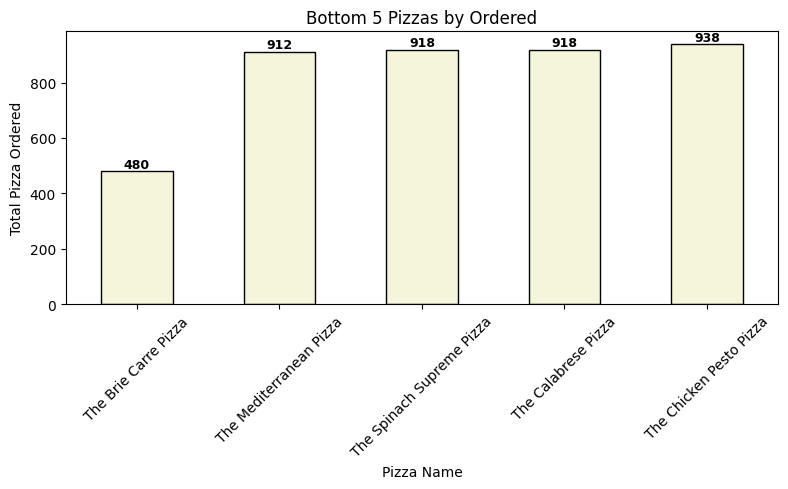

In [65]:
pizzas_by_name = df.groupby('pizza_name')['order_id'].nunique()

Bottom5 =  pizzas_by_name.sort_values(ascending=True).head(5)

ax = Bottom5.plot(
    kind='bar', figsize=(8,5),
    color='beige', edgecolor='black'
)

plt.title("Bottom 5 Pizzas by Ordered")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza Ordered")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Bottom5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


### Bottom 5 Selling Pizzas - Total Quantity

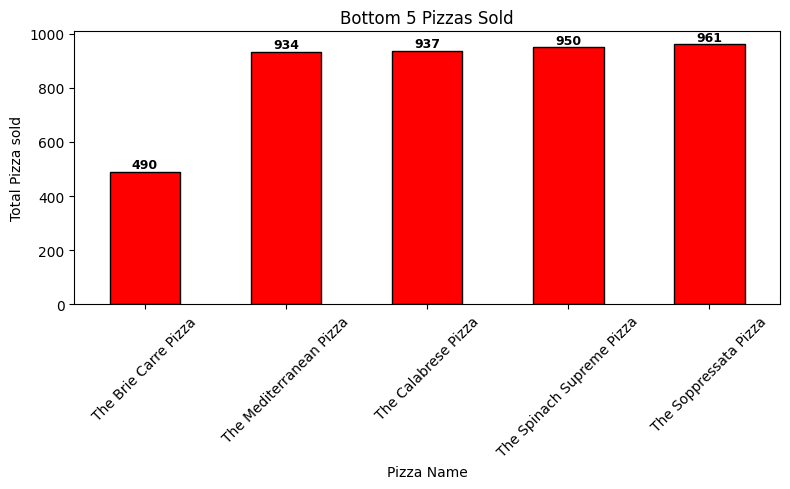

In [66]:
pizzas_by_name = df.groupby('pizza_name')['quantity'].sum()

Bottom5 =  pizzas_by_name.sort_values(ascending=True).head(5)

ax = Bottom5.plot(
    kind='bar', figsize=(8,5),
    color='red', edgecolor='black'
)

plt.title("Bottom 5 Pizzas Sold")
plt.xlabel("Pizza Name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

# annotate bars
for i, val in enumerate(Bottom5.values):
    plt.text(i, val + 2, str(val),
             ha='center', va='bottom',
             fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
